In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from pathlib import Path
import cv2

In [2]:
from functions_custom import load_data, train_model, plot_output

Simple image classification example: https://www.tensorflow.org/tutorials/images/classification

# Set up

In [3]:
train_dir = Path("..", "data", "3_Train_Test_Folder", "train")
test_dir = Path("..", "data", "3_Train_Test_Folder", "test")

In [4]:
BATCH_SIZE = 32
EPOCHS = 15

img_height = 180
img_width = 180

In [5]:
train, test, num_classes = load_data(train_dir, test_dir, BATCH_SIZE, img_height, img_width)

Found 262 files belonging to 2 classes.
Found 106 files belonging to 2 classes.


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

# Model_01

Epoch 1/15
9/9 [==============================] - 4s 335ms/step - loss: 0.7668 - accuracy: 0.5496 - val_loss: 0.6421 - val_accuracy: 0.7736
Epoch 2/15
9/9 [==============================] - 3s 312ms/step - loss: 0.5687 - accuracy: 0.8282 - val_loss: 0.4803 - val_accuracy: 0.8019
Epoch 3/15
9/9 [==============================] - 3s 295ms/step - loss: 0.3932 - accuracy: 0.8473 - val_loss: 0.3819 - val_accuracy: 0.8113
Epoch 4/15
9/9 [==============================] - 3s 300ms/step - loss: 0.2978 - accuracy: 0.9122 - val_loss: 0.3529 - val_accuracy: 0.8113
Epoch 5/15
9/9 [==============================] - 3s 300ms/step - loss: 0.2744 - accuracy: 0.9046 - val_loss: 0.4118 - val_accuracy: 0.7642
Epoch 6/15
9/9 [==============================] - 3s 297ms/step - loss: 0.2625 - accuracy: 0.9198 - val_loss: 0.3647 - val_accuracy: 0.7736
Epoch 7/15
9/9 [==============================] - 3s 292ms/step - loss: 0.2290 - accuracy: 0.9351 - val_loss: 0.3307 - val_accuracy: 0.8019
Epoch 8/15
9/9 [====

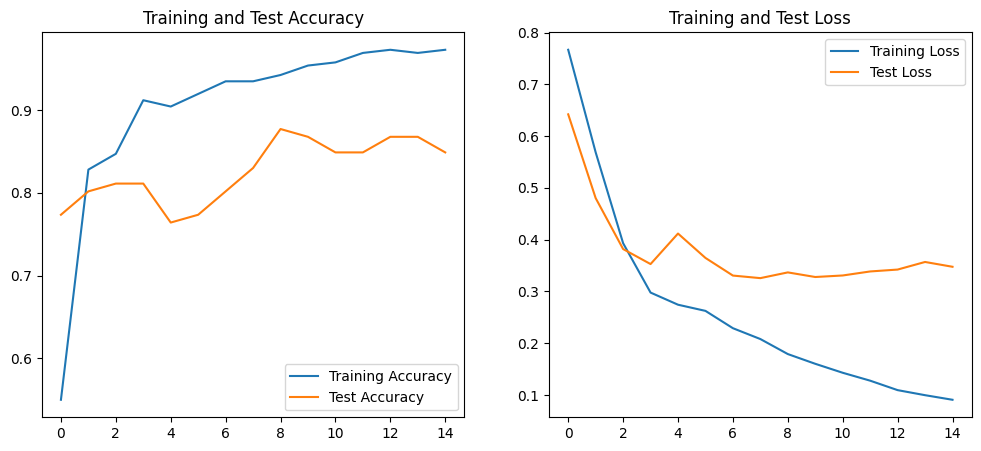

In [7]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)


folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_01")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# Model_02 - 2 conv layers

Epoch 1/15
9/9 [==============================] - 3s 286ms/step - loss: 1.7733 - accuracy: 0.5153 - val_loss: 0.8690 - val_accuracy: 0.6604
Epoch 2/15
9/9 [==============================] - 2s 262ms/step - loss: 0.6988 - accuracy: 0.7137 - val_loss: 0.6769 - val_accuracy: 0.7642
Epoch 3/15
9/9 [==============================] - 2s 271ms/step - loss: 0.3967 - accuracy: 0.8511 - val_loss: 0.4862 - val_accuracy: 0.7925
Epoch 4/15
9/9 [==============================] - 2s 263ms/step - loss: 0.3318 - accuracy: 0.8855 - val_loss: 0.3953 - val_accuracy: 0.7925
Epoch 5/15
9/9 [==============================] - 2s 260ms/step - loss: 0.2286 - accuracy: 0.9313 - val_loss: 0.3385 - val_accuracy: 0.8491
Epoch 6/15
9/9 [==============================] - 2s 297ms/step - loss: 0.1821 - accuracy: 0.9389 - val_loss: 0.3463 - val_accuracy: 0.8679
Epoch 7/15
9/9 [==============================] - 2s 268ms/step - loss: 0.1426 - accuracy: 0.9542 - val_loss: 0.3240 - val_accuracy: 0.8679
Epoch 8/15
9/9 [====

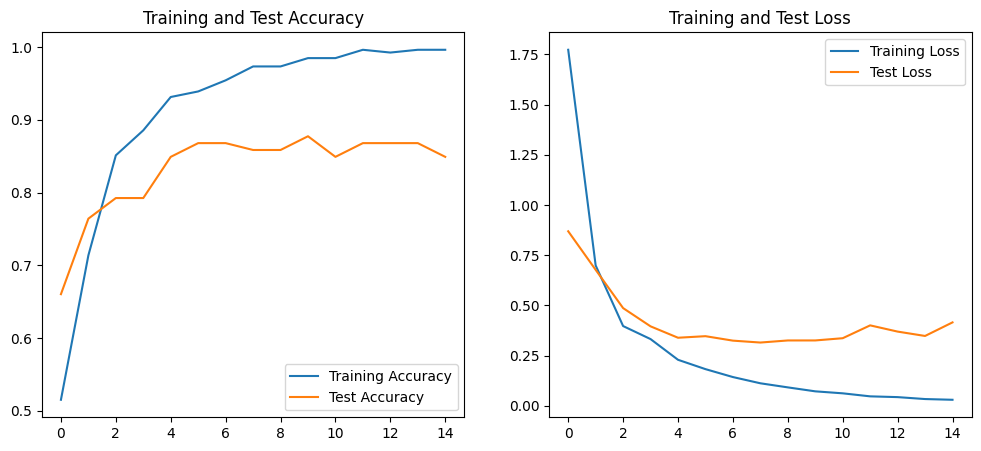

In [8]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_02")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# Model_03 - 4 conv layers

Epoch 1/15
9/9 [==============================] - 4s 347ms/step - loss: 0.6418 - accuracy: 0.7176 - val_loss: 0.5559 - val_accuracy: 0.6981
Epoch 2/15
9/9 [==============================] - 3s 350ms/step - loss: 0.4524 - accuracy: 0.7710 - val_loss: 0.4282 - val_accuracy: 0.7736
Epoch 3/15
9/9 [==============================] - 3s 363ms/step - loss: 0.3270 - accuracy: 0.8893 - val_loss: 0.3735 - val_accuracy: 0.8019
Epoch 4/15
9/9 [==============================] - 3s 347ms/step - loss: 0.2809 - accuracy: 0.9122 - val_loss: 0.4015 - val_accuracy: 0.8396
Epoch 5/15
9/9 [==============================] - 3s 349ms/step - loss: 0.3171 - accuracy: 0.9008 - val_loss: 0.5746 - val_accuracy: 0.8019
Epoch 6/15
9/9 [==============================] - 3s 369ms/step - loss: 0.3462 - accuracy: 0.8626 - val_loss: 0.3446 - val_accuracy: 0.8491
Epoch 7/15
9/9 [==============================] - 3s 359ms/step - loss: 0.2712 - accuracy: 0.9084 - val_loss: 0.3431 - val_accuracy: 0.8208
Epoch 8/15
9/9 [====

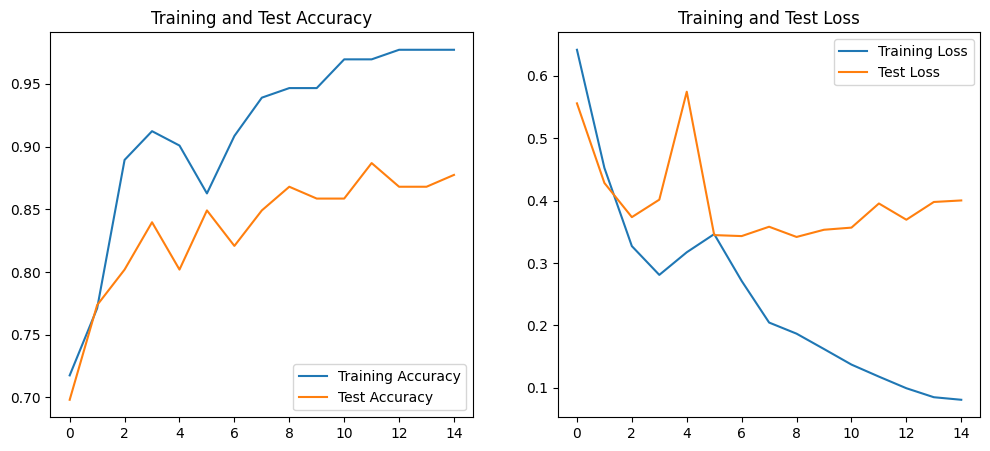

In [9]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_03")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# Model 04 - 2 fully connected layers (dropout)

Epoch 1/15
9/9 [==============================] - 3s 316ms/step - loss: 0.6976 - accuracy: 0.5420 - val_loss: 0.6248 - val_accuracy: 0.6509
Epoch 2/15
9/9 [==============================] - 3s 287ms/step - loss: 0.5827 - accuracy: 0.7176 - val_loss: 0.5081 - val_accuracy: 0.7736
Epoch 3/15
9/9 [==============================] - 3s 287ms/step - loss: 0.4345 - accuracy: 0.8282 - val_loss: 0.4318 - val_accuracy: 0.7547
Epoch 4/15
9/9 [==============================] - 3s 316ms/step - loss: 0.3746 - accuracy: 0.8473 - val_loss: 0.4821 - val_accuracy: 0.7830
Epoch 5/15
9/9 [==============================] - 3s 312ms/step - loss: 0.3317 - accuracy: 0.8511 - val_loss: 0.3812 - val_accuracy: 0.7830
Epoch 6/15
9/9 [==============================] - 3s 317ms/step - loss: 0.3103 - accuracy: 0.8664 - val_loss: 0.3482 - val_accuracy: 0.8491
Epoch 7/15
9/9 [==============================] - 3s 296ms/step - loss: 0.2777 - accuracy: 0.9046 - val_loss: 0.3501 - val_accuracy: 0.8491
Epoch 8/15
9/9 [====

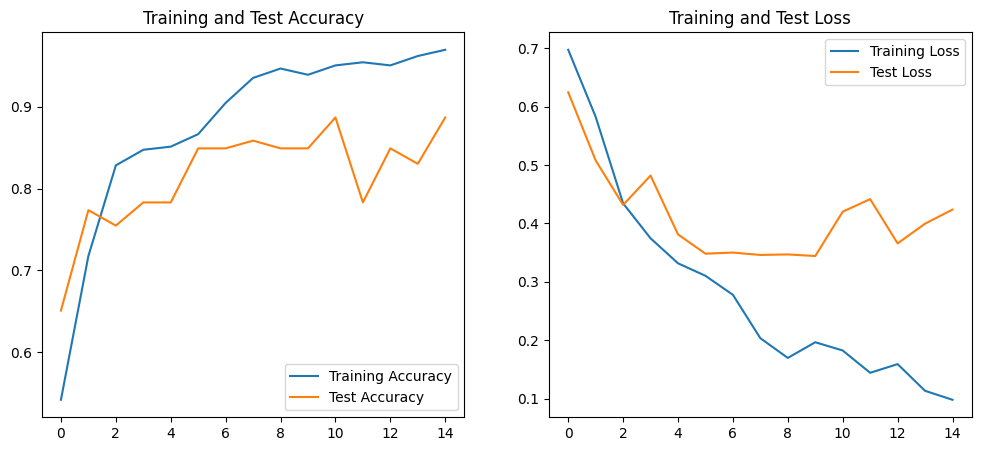

In [11]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_04_dropout")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# Model 4 (2 fully connected layers) original

In [ ]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_04")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# ~Model_05 5 conv layers

Epoch 1/15
9/9 [==============================] - 3s 301ms/step - loss: 0.6352 - accuracy: 0.6679 - val_loss: 0.5563 - val_accuracy: 0.8019
Epoch 2/15
9/9 [==============================] - 3s 279ms/step - loss: 0.4406 - accuracy: 0.8244 - val_loss: 0.3895 - val_accuracy: 0.7736
Epoch 3/15
9/9 [==============================] - 3s 281ms/step - loss: 0.3893 - accuracy: 0.8588 - val_loss: 0.3499 - val_accuracy: 0.8396
Epoch 4/15
9/9 [==============================] - 3s 286ms/step - loss: 0.3356 - accuracy: 0.8588 - val_loss: 0.3844 - val_accuracy: 0.8585
Epoch 5/15
9/9 [==============================] - 3s 288ms/step - loss: 0.3108 - accuracy: 0.8893 - val_loss: 0.4026 - val_accuracy: 0.8491
Epoch 6/15
9/9 [==============================] - 3s 333ms/step - loss: 0.2663 - accuracy: 0.9160 - val_loss: 0.3400 - val_accuracy: 0.8585
Epoch 7/15
9/9 [==============================] - 3s 303ms/step - loss: 0.2235 - accuracy: 0.9237 - val_loss: 0.3430 - val_accuracy: 0.8396
Epoch 8/15
9/9 [====

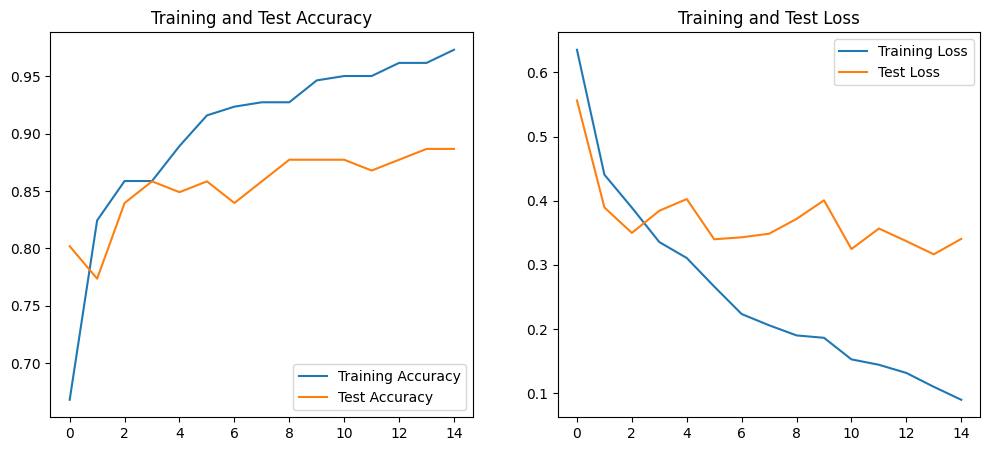

In [12]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_05")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# ~Model_06 6 conv layers

Epoch 1/15
9/9 [==============================] - 4s 393ms/step - loss: 0.6865 - accuracy: 0.5534 - val_loss: 0.6571 - val_accuracy: 0.7830
Epoch 2/15
9/9 [==============================] - 3s 328ms/step - loss: 0.6101 - accuracy: 0.6985 - val_loss: 0.5880 - val_accuracy: 0.6792
Epoch 3/15
9/9 [==============================] - 3s 337ms/step - loss: 0.4616 - accuracy: 0.8015 - val_loss: 0.5323 - val_accuracy: 0.7453
Epoch 4/15
9/9 [==============================] - 3s 318ms/step - loss: 0.3788 - accuracy: 0.8092 - val_loss: 0.4846 - val_accuracy: 0.7642
Epoch 5/15
9/9 [==============================] - 3s 317ms/step - loss: 0.3421 - accuracy: 0.8702 - val_loss: 0.4181 - val_accuracy: 0.7736
Epoch 6/15
9/9 [==============================] - 3s 318ms/step - loss: 0.2695 - accuracy: 0.8969 - val_loss: 0.3745 - val_accuracy: 0.8396
Epoch 7/15
9/9 [==============================] - 3s 313ms/step - loss: 0.2293 - accuracy: 0.9122 - val_loss: 0.3670 - val_accuracy: 0.8585
Epoch 8/15
9/9 [====

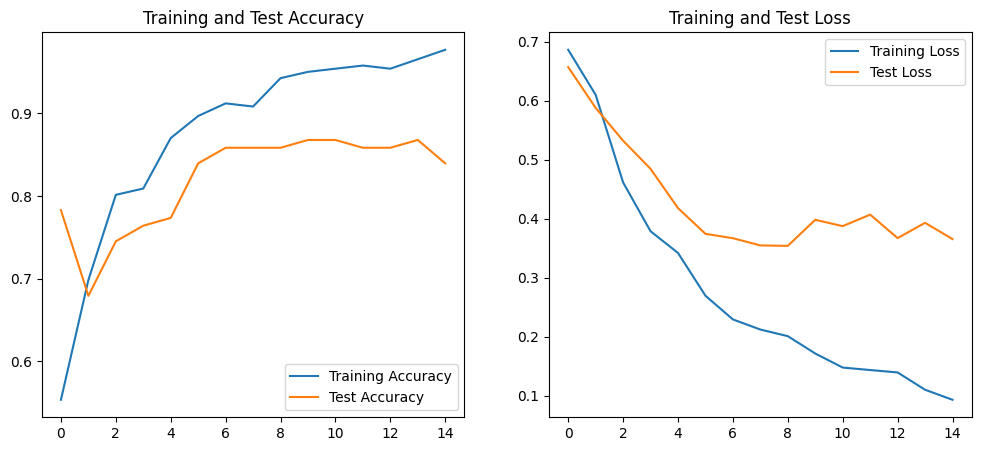

In [13]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_06")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

# ~Model_07 13 conv layers

Epoch 1/15
9/9 [==============================] - 4s 404ms/step - loss: 0.6935 - accuracy: 0.4809 - val_loss: 0.6904 - val_accuracy: 0.5377
Epoch 2/15
9/9 [==============================] - 3s 375ms/step - loss: 0.6781 - accuracy: 0.5382 - val_loss: 0.6597 - val_accuracy: 0.5377
Epoch 3/15
9/9 [==============================] - 3s 418ms/step - loss: 0.5565 - accuracy: 0.7214 - val_loss: 0.5026 - val_accuracy: 0.7170
Epoch 4/15
9/9 [==============================] - 3s 379ms/step - loss: 0.3935 - accuracy: 0.8435 - val_loss: 0.4780 - val_accuracy: 0.7736
Epoch 5/15
9/9 [==============================] - 3s 377ms/step - loss: 0.3083 - accuracy: 0.8664 - val_loss: 0.4038 - val_accuracy: 0.8208
Epoch 6/15
9/9 [==============================] - 3s 385ms/step - loss: 0.2472 - accuracy: 0.8931 - val_loss: 0.4244 - val_accuracy: 0.8208
Epoch 7/15
9/9 [==============================] - 4s 429ms/step - loss: 0.2283 - accuracy: 0.9084 - val_loss: 0.4841 - val_accuracy: 0.8585
Epoch 8/15
9/9 [====

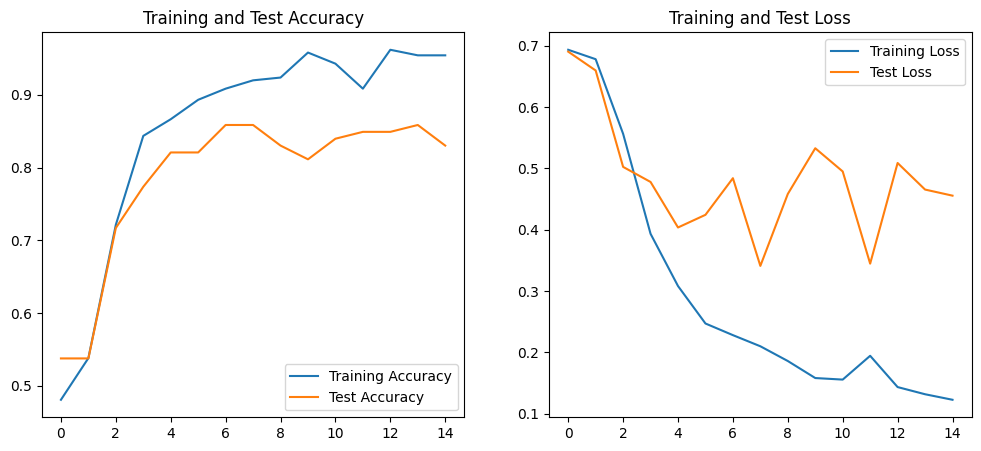

In [14]:
model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

folder_path = Path("..", "outputs", f'batchsize_{BATCH_SIZE}', "model_07")

model = train_model(model, train, test, folder_path, EPOCHS)

plot_output(model, EPOCHS, BATCH_SIZE, folder_path)

In [ ]:
#layers.Dropout(.2)